# Decision Tree Exercise

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.utils import class_weight
import numpy as np

In [2]:
# 1. Criar o conjunto de dados
data = {
    'Idade': [55, 45, 60, 70, 35, 50, 40, 65, 75, 30, 50],
    'Pressão Arterial': ['Alta', 'Normal', 'Alta', 'Normal', 'Normal', 'Alta', 'Normal', 'Alta', 'Normal', 'Alta', 'Normal'],
    'Colesterol': ['Alto', 'Alto', 'Normal', 'Alto', 'Normal', 'Alto', 'Normal', 'Alto', 'Normal', 'Alto', 'Normal'],
    'Nível de Atividade': ['Baixo', 'Médio', 'Alto', 'Baixo', 'Alto', 'Médio', 'Alto', 'Baixo', 'Médio', 'Alto', 'Baixo'],
    'Fuma': ['Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não'],
    'Diagnóstico': ['Doença Cardíaca', 'Doença Cardíaca', 'Doença Cardíaca', 'Saúde', 'Saúde', 'Doença Cardíaca', 'Saúde', 'Saúde', 'Saúde', 'Doença Cardíaca', 'Saúde']
}


In [3]:
# Criar DataFrame
df = pd.DataFrame(data)


In [4]:
# Codificar variáveis categóricas
df_encoded = pd.get_dummies(df, columns=['Pressão Arterial', 'Colesterol', 'Nível de Atividade', 'Fuma'])

In [5]:
# Separar features e target
X = df_encoded.drop('Diagnóstico', axis=1)
y = df_encoded['Diagnóstico']

In [6]:
# Codificar target
y_encoded = y.map({'Doença Cardíaca': 1, 'Saúde': 0})

# Calcular pesos das classes para lidar com o desbalanceamento
classes = np.array([0, 1])
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y_encoded)
class_weights_dict = dict(enumerate(class_weights))
print("Pesos das Classes:", class_weights_dict)


Pesos das Classes: {0: 0.9166666666666666, 1: 1.1}


In [7]:
# Dividir os dados em treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train = X
y_train = y_encoded

In [8]:
# Criar e treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Mostrar as regras da árvore
print("Regras da Árvore de Decisão:")
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

Regras da Árvore de Decisão:
|--- Pressão Arterial_Normal <= 0.50
|   |--- Idade <= 62.50
|   |   |--- class: 1
|   |--- Idade >  62.50
|   |   |--- class: 0
|--- Pressão Arterial_Normal >  0.50
|   |--- Colesterol_Alto <= 0.50
|   |   |--- class: 0
|   |--- Colesterol_Alto >  0.50
|   |   |--- Fuma_Sim <= 0.50
|   |   |   |--- class: 1
|   |   |--- Fuma_Sim >  0.50
|   |   |   |--- class: 0



In [10]:
# Visualizar a árvore de decisão
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Saúde', 'Doença Cardíaca'],
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('arvore_decisao_example2', format='png', view=True)

'arvore_decisao_example2.png'

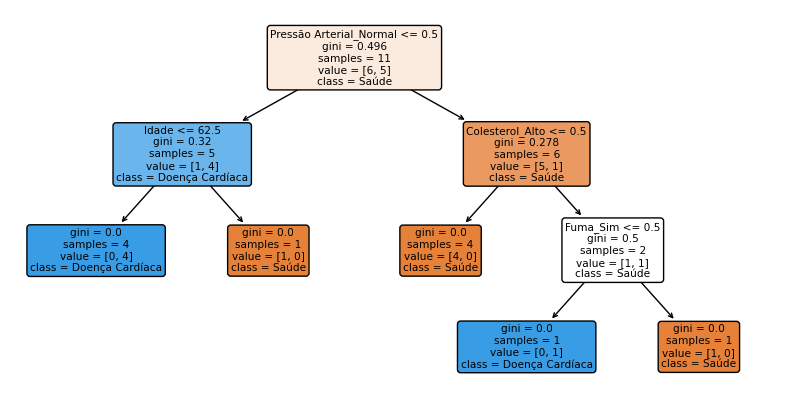

In [11]:
# Plotar a árvore usando matplotlib
plt.figure(figsize=(10,5))
a = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=['Saúde', 'Doença Cardíaca'], 
                   filled=True, 
                   rounded=True)
plt.show()